In [68]:
import os
import json
import seaborn as sns

path="experiments"
results = []
for el in os.listdir(path):
    if el.endswith("json"):
        with open(path+"/"+el) as f:
            report = json.load(f)
            report["filename"] = el
            if "augment" not in report:
                report["augment"] = "none"
            if "train" not in report:
                report["train"] = "standard"
            results.append(report)

import pandas as pd
res_df = pd.DataFrame.from_dict(results)
res_df

,name,run,augment,train,best_accuracy_validation,time_generated,trajectory,filename
0,vgg16,9,flip,morepatient,0.8784,2023-03-22T04:07:14.040963,"[{'epoch': 0, 'train': 0.24384444444444445, 'v...",train_morepatient_aug_flip_arch_vgg16_9_report...
1,vgg16,4,fliprotate,fasterlearn,0.8692,2023-03-21T07:45:54.197327,"[{'epoch': 0, 'train': 0.18386666666666668, 'v...",train_fasterlearn_aug_fliprotate_arch_vgg16_4_...
2,vgg16,1,fliprotate,fasterlearn,0.8612,2023-03-20T18:25:35.112154,"[{'epoch': 0, 'train': 0.18764444444444445, 'v...",train_fasterlearn_aug_fliprotate_arch_vgg16_1_...
3,vgg11,9,fullrotate,standard,0.7318,2023-03-20T11:56:47.360322,"[{'epoch': 0, 'train': 0.2404888888888889, 'va...",aug_fullrotate_arch_vgg11_9_report.json
4,vgg13,1,flip,fasterlearn,0.8502,2023-03-20T14:47:48.123306,"[{'epoch': 0, 'train': 0.20193333333333333, 'v...",train_fasterlearn_aug_flip_arch_vgg13_1_report...
...,...,...,...,...,...,...,...,...
393,vgg16,4,smallrotate,morepatient,0.8548,2023-03-21T07:24:11.862303,"[{'epoch': 0, 'train': 0.3194222222222222, 'va...",train_morepatient_aug_smallrotate_arch_vgg16_4...
394,vgg16,2,flip,morepatient,0.8832,2023-03-20T21:46:10.591042,"[{'epoch': 0, 'train': 0.2712888888888889, 'va...",train_morepatient_aug_flip_arch_vgg16_2_report...
395,vgg13,3,fliprotate,fasterlearn,0.8746,2023-03-21T01:19:08.893461,"[{'epoch': 0, 'train': 0.12946666666666667, 'v...",train_fasterlearn_aug_fliprotate_arch_vgg13_3_...
396,vgg16,4,none,standard,0.8580,2023-03-25T11:38:53.419933,"[{'epoch': 0, 'train': 0.2759333333333333, 'va...",aug_cutout_archvgg16_4_report.json


In [69]:
top10_models = res_df.sort_values("best_accuracy_validation", ascending=False).head(10)
top10_models

,name,run,augment,train,best_accuracy_validation,time_generated,trajectory,filename
34,vgg13,2,fliprotate,morepatient,0.8936,2023-03-20T21:04:57.084226,"[{'epoch': 0, 'train': 0.3589333333333333, 'va...",train_morepatient_aug_fliprotate_arch_vgg13_2_...
306,vgg13,9,fliprotate,morepatient,0.8936,2023-03-22T03:29:41.870309,"[{'epoch': 0, 'train': 0.34302222222222223, 'v...",train_morepatient_aug_fliprotate_arch_vgg13_9_...
296,vgg13,7,fliprotate,morepatient,0.8926,2023-03-21T18:51:02.923571,"[{'epoch': 0, 'train': 0.31766666666666665, 'v...",train_morepatient_aug_fliprotate_arch_vgg13_7_...
350,vgg16,6,flip,morepatient,0.8918,2023-03-21T15:07:27.260303,"[{'epoch': 0, 'train': 0.26868888888888887, 'v...",train_morepatient_aug_flip_arch_vgg16_6_report...
216,vgg16,1,fliprotate,morepatient,0.8880,2023-03-20T18:59:07.795426,"[{'epoch': 0, 'train': 0.2218, 'validation': 0...",train_morepatient_aug_fliprotate_arch_vgg16_1_...
285,vgg13,3,flip,morepatient,0.8868,2023-03-21T00:00:03.137675,"[{'epoch': 0, 'train': 0.244, 'validation': 0....",train_morepatient_aug_flip_arch_vgg13_3_report...
275,vgg13,1,fliprotate,morepatient,0.8864,2023-03-20T16:45:56.359547,"[{'epoch': 0, 'train': 0.3294888888888889, 'va...",train_morepatient_aug_fliprotate_arch_vgg13_1_...
280,vgg16,6,fliprotate,morepatient,0.8856,2023-03-21T16:49:56.406044,"[{'epoch': 0, 'train': 0.2744888888888889, 'va...",train_morepatient_aug_fliprotate_arch_vgg16_6_...
284,vgg16,8,fliprotate,morepatient,0.8856,2023-03-22T01:33:59.460287,"[{'epoch': 0, 'train': 0.2376, 'validation': 0...",train_morepatient_aug_fliprotate_arch_vgg16_8_...
107,vgg13,4,flip,standard,0.8844,2023-03-19T12:14:52.600581,"[{'epoch': 0, 'train': 0.3201111111111111, 'va...",aug_flip_arch_vgg13_4_report.json


In [70]:
top10_models["model_filename"] = top10_models["filename"].apply(lambda x: x.replace("report.json", "model.pt"))
top10_models["model_filename"]

34     train_morepatient_aug_fliprotate_arch_vgg13_2_...
306    train_morepatient_aug_fliprotate_arch_vgg13_9_...
296    train_morepatient_aug_fliprotate_arch_vgg13_7_...
350     train_morepatient_aug_flip_arch_vgg16_6_model.pt
216    train_morepatient_aug_fliprotate_arch_vgg16_1_...
285     train_morepatient_aug_flip_arch_vgg13_3_model.pt
275    train_morepatient_aug_fliprotate_arch_vgg13_1_...
280    train_morepatient_aug_fliprotate_arch_vgg16_6_...
284    train_morepatient_aug_fliprotate_arch_vgg16_8_...
107                       aug_flip_arch_vgg13_4_model.pt
Name: model_filename, dtype: object

In [71]:
from torch import nn
from DeepLearning.Project1.data import *
import torch

class VGG(nn.Module):
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [2]:
model = torch.load("experiments/train_morepatient_aug_flip_arch_vgg16_6_model.pt")
model = model.to("cuda")
model = model.eval()

In [4]:
train, val = load_cifar10_train_dataloaders_validation_kaggle(bs=128)

In [5]:
def eval_accuracy(model, dataloader, training_device="cuda"):
    model.eval()
    with torch.no_grad():
        model.to(training_device)
        correct = 0
        all_so_far = 0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(training_device), labels.to(training_device)
            pred = torch.argmax(model(inputs), dim=1)

            all_so_far += labels.size().numel()
            correct += torch.sum(pred.eq(labels)).item()
    model.train()
    return correct/all_so_far

In [6]:
eval_accuracy(model, train, training_device="cuda")

0.9733555555555555

In [16]:
rev_name_dictionary = {
    v: k
    for k, v in name_dict.items()
}

In [10]:
rev_name_dictionary

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [139]:
def eval_on_data(model, dataloader, device="cuda"):
    results = []
    model.eval()
    with torch.no_grad():
        model.to(device)
        for inputs in dataloader:
            if type(inputs) == list:
                inputs, _ = inputs
            inputs = inputs.to(device)
            pred = torch.argmax(model(inputs), dim=1)
            for p in pred.cpu().numpy():
                results.append(p)
            
    model.train()
    return results

In [49]:
test = load_cifar10_test_dataloader_kaggle(bs=1000)

In [50]:
results = eval_on_data(model, test)

In [58]:
import pandas as pd
df = pd.DataFrame()

In [59]:
df["id"] = [i for i in range(1, 300_001)]

In [60]:
df["label"] = [rev_name_dictionary[result] for result in results]

In [95]:
df.to_csv("submission.csv", index=False)

In [65]:
def load_and_eval_model(model_name, dataloader, device="cuda"):
    model = torch.load("experiments/" + model_name)
    model = model.to(device)
    model = model.eval()
    return eval_on_data(model, dataloader)

In [66]:
df2 = pd.DataFrame()
df2["id"] = [i for i in range(1, 300_001)]

In [72]:
for model_filename in top10_models["model_filename"]:
    df2[model_filename] = load_and_eval_model(model_filename, test)

In [81]:
from collections import Counter

In [86]:
df2["label"] = [
    Counter(df2.iloc[i,1:]).most_common()[0][0]
    for i in range(300_000)
]

In [96]:
df2["label"] = [rev_name_dictionary[result] for result in df2["label"]]

In [97]:
df2[["id", "label"]].to_csv("submission2.csv", index=False)

In [98]:
train = load_cifar10_test_dataloader_kaggle(".data-cifar/train", bs=1000)

In [99]:
df_perclass = pd.DataFrame()

In [100]:
for model_filename in top10_models["model_filename"]:
    df_perclass[model_filename] = load_and_eval_model(model_filename, train)

In [103]:
df_perclass["label"] = [
    Counter(df_perclass.iloc[i,1:]).most_common()[0][0]
    for i in range(50_000)
]

In [105]:
ds = Cifar10Dataset(".data-cifar/train", ".data-cifar/trainLabels.csv")

In [111]:
df_perclass.to_csv("perclass.csv")

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [117]:
confusion_matrix(df_perclass["label"], [x[1] for x in ds.labels])

array([[5000,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0, 4998,    0,    0,    0,    0,    0,    0,    1,    2],
       [   0,    0, 4999,    1,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0, 4995,    0,    7,    2,    0,    0,    0],
       [   0,    0,    0,    1, 4999,    1,    0,    0,    0,    0],
       [   0,    0,    1,    3,    0, 4988,    1,    0,    0,    0],
       [   0,    1,    0,    0,    0,    1, 4996,    0,    0,    0],
       [   0,    0,    0,    0,    1,    2,    0, 5000,    0,    1],
       [   0,    1,    0,    0,    0,    0,    0,    0, 4998,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1, 4997]])

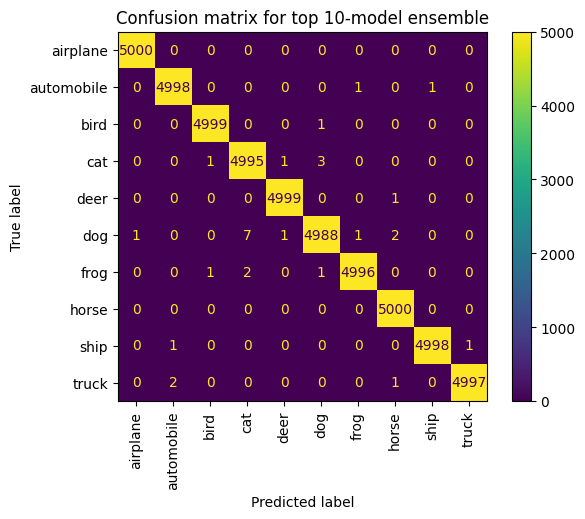

In [125]:
ConfusionMatrixDisplay.from_predictions(
    y_pred=df_perclass["label"],
    y_true=[x[1] for x in ds.labels],
    display_labels=[k for k in name_dict.keys()],
    xticks_rotation="vertical"
)
import matplotlib.pyplot as plt
plt.title("Confusion matrix for top 10-model ensemble")
plt.show()

In [128]:
df3 = pd.DataFrame()
df3["id"] = [i for i in range(1, 300_001)]
for model_filename in (
    res_df
    .sort_values("best_accuracy_validation", ascending=False)
    .head(20)
    ["filename"]
    .apply(lambda x: x.replace("report.json", "model.pt"))
):
    df3[model_filename] = load_and_eval_model(model_filename, test)

df3["label"] = [
    Counter(df3.iloc[i,1:]).most_common()[0][0]
    for i in range(300_000)
]
df3["label"] = [rev_name_dictionary[result] for result in df3["label"]]
df3[["id", "label"]].to_csv("submission3.csv", index=False)

In [129]:
df4 = pd.DataFrame()
df4["id"] = [i for i in range(1, 300_001)]
for model_filename in (
    res_df
    .sort_values("best_accuracy_validation", ascending=False)
    .head(5)
    ["filename"]
    .apply(lambda x: x.replace("report.json", "model.pt"))
):
    df4[model_filename] = load_and_eval_model(model_filename, test)

df4["label"] = [
    Counter(df4.iloc[i,1:]).most_common()[0][0]
    for i in range(300_000)
]
df4["label"] = [rev_name_dictionary[result] for result in df4["label"]]
df4[["id", "label"]].to_csv("submission4.csv", index=False)

In [130]:
from torchvision.datasets import CIFAR10

In [137]:
test_tv_ds = CIFAR10(".data", train=False, transform=global_transform)
test_tv_y = [y for _, y in test_tv_ds]
test_tv_loader = DataLoader(test_tv_ds, batch_size=1000)

In [140]:
df_test_perclass = pd.DataFrame()
for model_filename in top10_models["model_filename"]:
    df_test_perclass[model_filename] = load_and_eval_model(model_filename, test_tv_loader)
    
df_test_perclass["label"] = [
    Counter(df_test_perclass.iloc[i,1:]).most_common()[0][0]
    for i in range(10_000)
]

df_test_perclass.to_csv("df_test_perclass.csv")

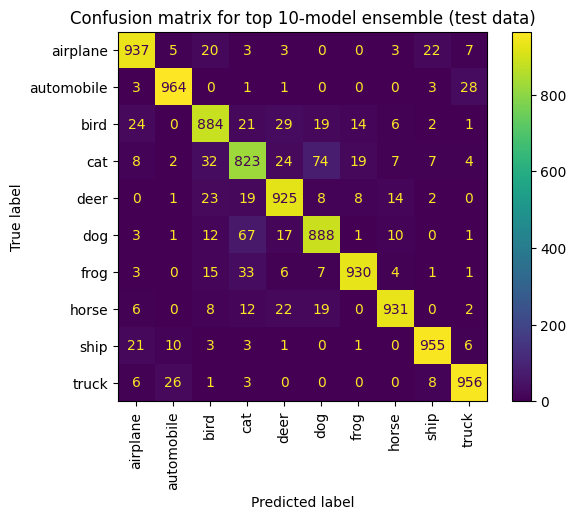

In [141]:
ConfusionMatrixDisplay.from_predictions(
    y_pred=df_test_perclass["label"],
    y_true=test_tv_y,
    display_labels=[k for k in name_dict.keys()],
    xticks_rotation="vertical"
)
import matplotlib.pyplot as plt
plt.title("Confusion matrix for top 10-model ensemble (test data)")
plt.show()